# Project Spotify - Phase 2 - Understanding Keys, Genre Clusturing and Predicting Hit Songs

<b>Import All Packages

In [ ]:
import sys
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
# %matplotlib inline
plt.ion()
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression


<b> Load All the Data Files and do pre-processing

Load the main dataset as well as the ancillary data files. <br>
Perform some basic pre-processing to remove the brackets around the artist name. <br>
Convert the numeric song-key into correspondning letter for easier identification.

In [ ]:
# loading data

pd.set_option('display.max_rows', None)

# Read in all the data files
df = pd.read_csv('./spotify_dataset/data.csv')
df_by_artist = pd.read_csv('./spotify_dataset/data_by_artist.csv')
df_by_genres = pd.read_csv('./spotify_dataset/data_by_genres.csv')
df_by_year = pd.read_csv('./spotify_dataset/data_by_year.csv')
df_with_genres = pd.read_csv('./spotify_dataset/data_w_genres.csv')

df['artists'] = df['artists'].str.replace('[','')
df['artists'] = df['artists'].str.replace(']','')
df['artists'] = df['artists'].str.replace("'",'')

#df.info()

conds = [
    df['key'] == 0,
    df['key'] == 1,
    df['key'] == 2,
    df['key'] == 3,
    df['key'] == 4,
    df['key'] == 5,
    df['key'] == 6,
    df['key'] == 7,
    df['key'] == 8,
    df['key'] == 9,
    df['key'] == 10,
    df['key'] == 11
]
choices = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
df['num_key'] = np.select(conds, choices)

We want to look at the song-keys for some well know bands so we can see if Spotify's algorithm is always correct. Will need to do some of this manually as we weren't able to find an accurate source on the web.

In [ ]:
lz_mask = df['artists'] == "Led Zeppelin" 
led_zep = pd.DataFrame(df[lz_mask])

b_mask = df['artists'] == "The Beatles"
beatles = pd.DataFrame(df[b_mask])

r_mask = df['artists'] == "Rush"
rush = pd.DataFrame(df[r_mask])
print('Rush Song and Keys\n')
print(rush[['name','num_key']].head(50))

who_mask = df['artists'] == "The Who"
the_who = pd.DataFrame(df[who_mask])
the_who.sort_values('name',inplace=True)
print('The Who Song and Keys\n')
print(the_who[['name','num_key']].head(50))

# led_zep['new_key'] = np.select(conds, choices)
led_zep.sort_values('popularity',inplace=True, ascending=False)

print('Led Zeppelin Song and Keys\n')
print(led_zep[['name','num_key','popularity','valence']].head(10))
print()

print(led_zep.columns)
print()

l_yr_filter = led_zep['year']< 1985
y = led_zep[l_yr_filter]

b_yr_filter = beatles['year']< 1985
z = beatles[b_yr_filter]


<b>Comparison of popularity of songs for The Beatles and Led Zeppelin</b>

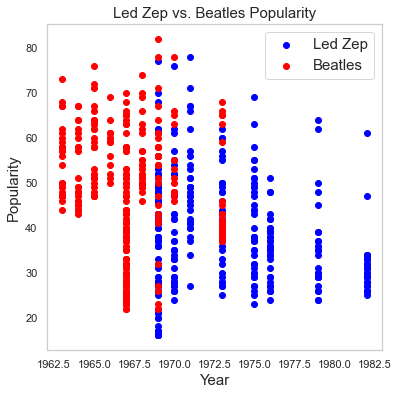

In [ ]:
print()
fig = plt.figure(figsize = (6,6))
_ = plt.scatter(y['year'], y['popularity'], color="blue", marker='o', label='Led Zep')
_ = plt.scatter(z['year'], z['popularity'], color="red", marker='o', label='Beatles')

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Popularity", fontsize = 15)
plt.title('Led Zep vs. Beatles Popularity', fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

<b> Count of the most common keys of a given song</b>

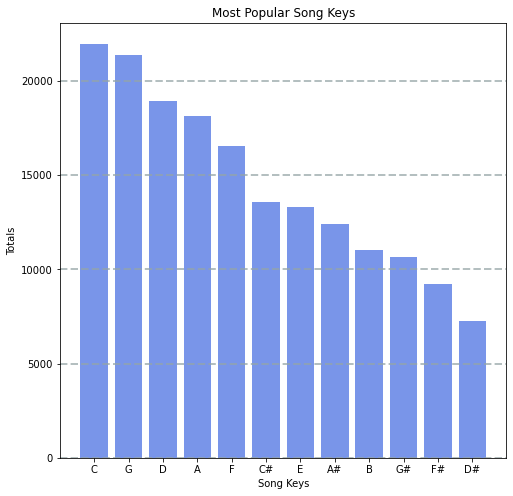

In [ ]:
tmp = df['new_key'].value_counts()
tmp.index
plt.figure(figsize = (8,8))
plt.bar(tmp.index,df['new_key'].value_counts().values,color='royalblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xlabel('Song Keys')
plt.ylabel('Totals')
plt.title('Most Popular Song Keys')
plt.show()

<b> Artists with most songs in the dataset

In [ ]:
print(df['artists'].value_counts().head(25))

Tadeusz Dolega Mostowicz             1281
Эрнест Хемингуэй                     1175
Эрих Мария Ремарк                    1062
Francisco Canaro                      951
Ignacio Corsini                       624
Frank Sinatra                         621
Elvis Presley                         494
Bob Dylan                             459
Johnny Cash                           456
Francisco Canaro, Charlo              456
Fleetwood Mac                         450
The Rolling Stones                    450
The Beach Boys                        434
Miles Davis                           427
The Beatles                           412
Billie Holiday                        397
Dean Martin                           392
Queen                                 391
Ella Fitzgerald                       389
Georgette Heyer, Irina Salkow         378
Lead Belly                            337
Led Zeppelin                          326
Lata Mangeshkar                       323
David Bowie                       

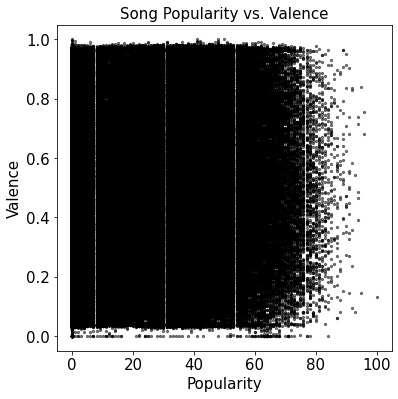

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

## set the figure dimensions
scat_fig = plt.figure(figsize = (6,6))
    
## make a scatter plot
_  = plt.scatter(
    df["popularity"],df["valence"],
    color = "black", s = 5, alpha = 0.5
)

## Set the tick and label fontsize
plt.tick_params(labelsize=15)

## Set the title
_ = plt.title("Song Popularity vs. Valence", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Valence", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Popularity", fontsize = 15)

In [ ]:
def standardize(data):
    mean = np.mean(data)
    stdev = np.std(data)
    
    standardized_data = (data - mean) / stdev
    
    return standardized_data

        popularity                                       name  year
20062     3.397235                            drivers license  2021
19862     3.214358                     Mood (feat. iann dior)  2020
19866     3.214358                                  positions  2020
19886     3.168639                                     DÁKITI  2020
19976     3.168639                                    BICHOTA  2020
19868     3.122920                                      34+35  2020
19870     3.122920                                    Whoopty  2020
19872     3.122920                                WITHOUT YOU  2020
19876     3.122920                             Therefore I Am  2020
19928     3.122920                         LA NOCHE DE ANOCHE  2020
19900     3.077201                         you broke me first  2020
19878     3.077201                    What You Know Bout Love  2020
39252     3.031482                               The Business  2020
76406     3.031482                              

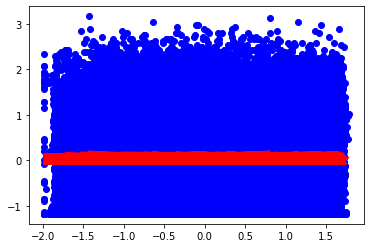

In [ ]:
df['popularity'] = standardize(df['popularity'])
df['valence'] = standardize(df['valence'])

df.sort_values('popularity',inplace=True, ascending=False)
print(df[['popularity', 'name', 'year']].head(100))

x = np.array(df['popularity']).reshape(-1,1)
print(x[:5])

y = np.array(df['valence']).reshape(-1,1)
print(y[:5])

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.25)

regr = LinearRegression()
regr.fit(X_train, Y_train)
print(regr.score(X_test, Y_test))

y_pred = regr.predict(X_test)
plt.scatter(Y_test, X_test, color='b')
plt.plot(Y_test, y_pred, color='r')


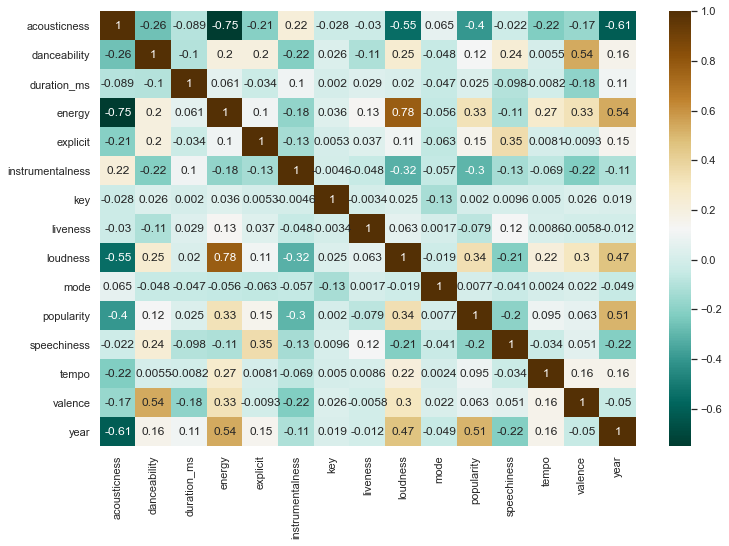

In [ ]:

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='BrBG_r')

## Genre Clustering Exploration ##

In [ ]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
# %matplotlib inline
plt.ion()
from pandas_profiling import ProfileReport
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

I'll be taking a look at the 'data_by_genres' dataset to determine if it has any utility to the overall project. The primary goal here is to determine if there is any underlying structure between genres that could be leveraged to augment a reccomendation system

In [ ]:
genre_df = pd.read_csv('./spotify_dataset/data_by_genres.csv')
all_genres= genre_df.loc[genre_df['genres'] != '[]'].copy()

genre_labels = all_genres[['genres']].copy()
all_genres.head()

genres  acousticness  danceability   duration_ms    energy  \
0  21st century classical      0.754600      0.284100  3.525932e+05  0.159580   
1                   432hz      0.485515      0.312000  1.047430e+06  0.391678   
2                   8-bit      0.028900      0.673000  1.334540e+05  0.950000   
4              a cappella      0.694276      0.516172  2.018391e+05  0.330533   
5                abstract      0.411262      0.473600  3.660984e+05  0.479400   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.484374  0.168580 -22.153400     0.062060   91.351000  0.143380   
1          0.477250  0.265940 -18.131267     0.071717  118.900933  0.236483   
2          0.630000  0.069000  -7.899000     0.292000  192.816000  0.997000   
4          0.036080  0.222983 -12.656547     0.083627  105.506031  0.454077   
5          0.841400  0.097160 -15.799400     0.045300  142.495400  0.274260   

   popularity  key  mode  
0    6.600000    4     1  
1   41.200000   11     1  
2    0.000000    5     1  
4   39.086248    7     1  
5   43.800000    5     1

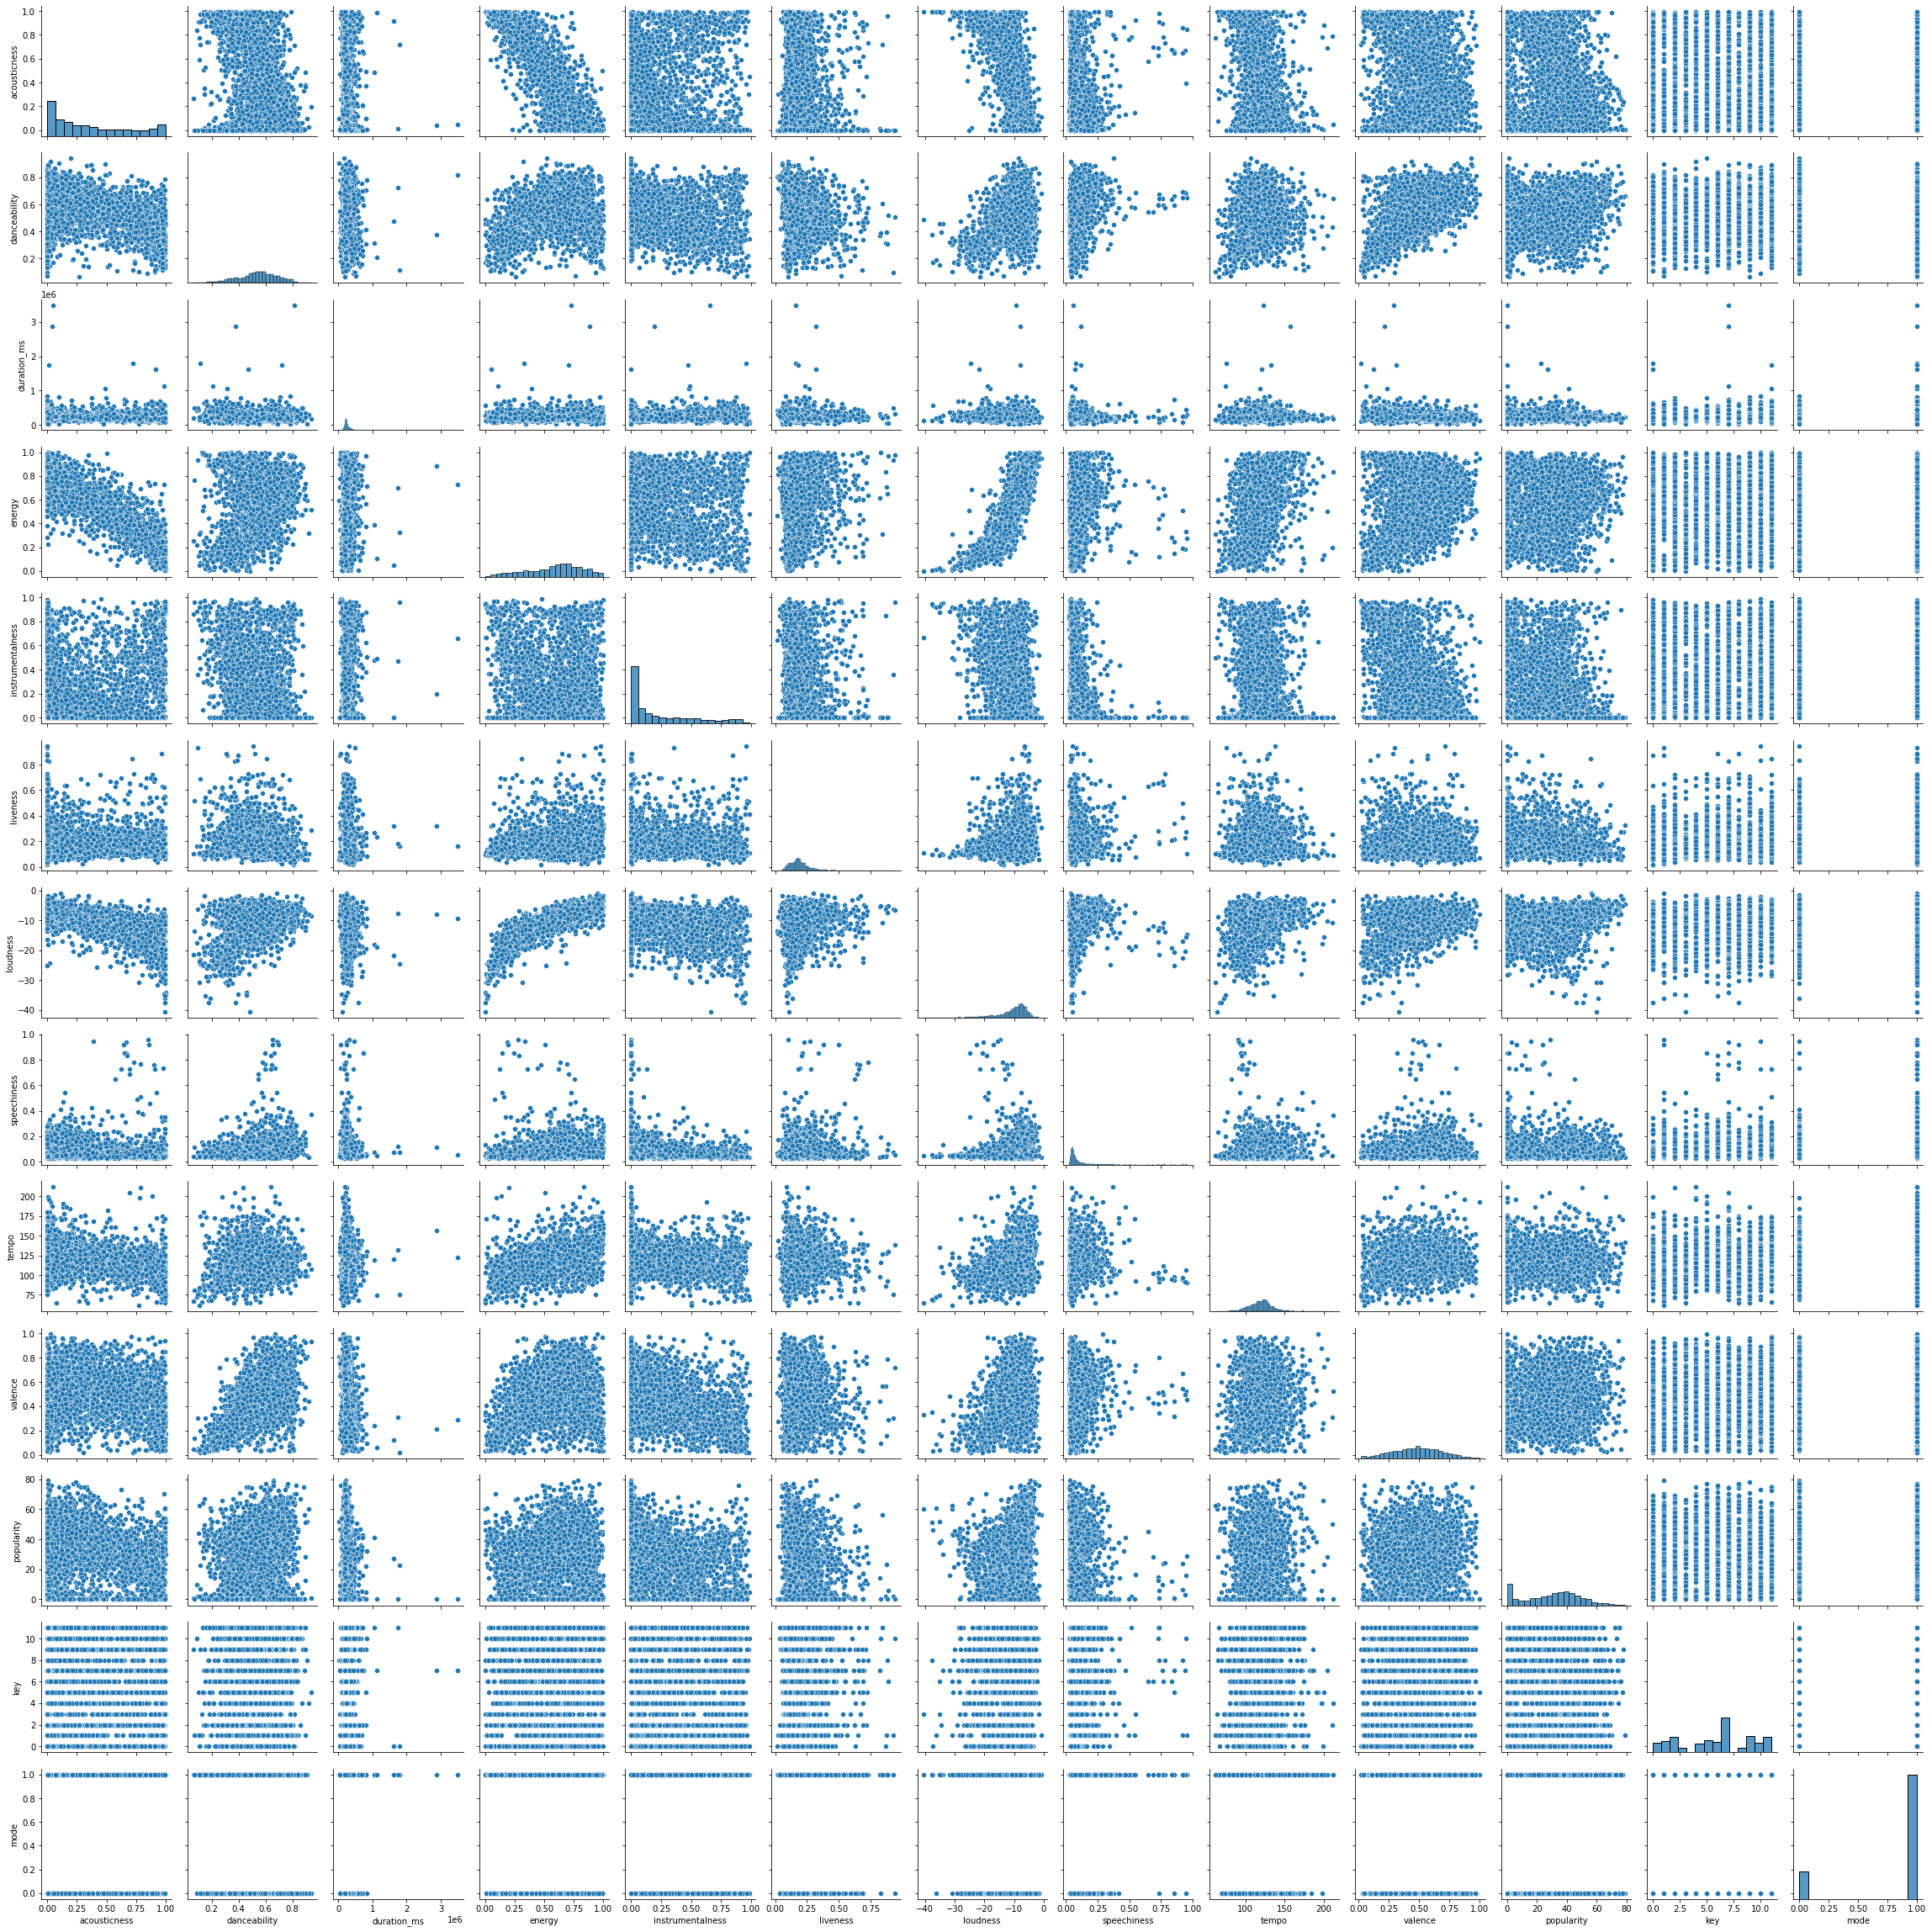

In [ ]:
sns.pairplot(all_genres)

In [ ]:
print('This dataset contains {} sperate genres'.format(len(genre_labels)))

This dataset contains 3231 sperate genres


3231 genres is a lot of items and it's my suspision that a significant amount of these are subgenres and share significant similarities to the parent class. Hopefully there will be distinct differences between some of these.

In my previous examination of the main dataset has already show that since Spotify's popularity metric is weighted by time in an unknown fashion it will be removed from the genre dataset moving forward

In [ ]:
# removing 'genres' since those are our labels and saved elsewhere
# removing 'duration_ms' since I don't feel like the duration of a song should impact the genre 
all_genres.drop(['popularity','genres','duration_ms'], axis=1, inplace=True)

In [ ]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(all_genres, genre_labels, random_state=111)

Since we intend to examine this dataset for some underlying structure, we will start by determining the importance of each feature

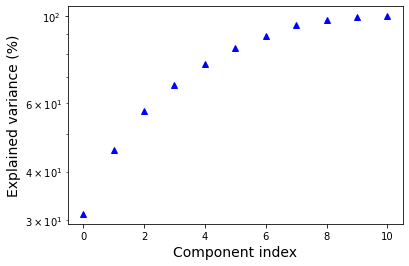

In [ ]:
pca_scaled = make_pipeline(StandardScaler(), PCA())
pca_scaled.fit(X_train.to_numpy())
pca = pca_scaled.named_steps['pca']
plt.figure(figsize=(6,4))
plt.semilogy(np.cumsum(pca.explained_variance_ratio_*100), 'b^')
plt.xlabel("Component index", fontsize = 14)
plt.ylabel("Explained variance (%)", fontsize = 14)
plt.show()

The above graph of Explained Variance tells us that to get as much of the variance captured, we should select the first 4 - 6 features. 

Since we don't know the number of clusters we _should_ find we need an algorithm that can find those groups on its own. I've selected DBSCAN for this job and fit it on the X_train data. 

In [ ]:
# Utility plotting function for dbscan categories from lecture notes
def plot_dbscan(dbscan, X, size = [100, 40]):
    plt.figure(figsize = (15,10))
    cores = dbscan.components_
    anomalies = X[dbscan.labels_ == -1]
    bound_index = list(set(np.where(dbscan.labels_ != -1)[0]).symmetric_difference(dbscan.core_sample_indices_))
    boundaries = X[bound_index]
    
    plt.scatter(cores[:, 0], cores[:, 1], marker='.', s=size[0], edgecolors='k',
                c=dbscan.labels_[dbscan.core_sample_indices_], cmap=plt.cm.Paired)
    
    plt.scatter(boundaries[:, 0], boundaries[:, 1], marker='o', s=size[1], edgecolors='k',
                c=dbscan.labels_[bound_index], cmap=plt.cm.Paired)
#     
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="1",alpha=0.4,s=size[0]/2)
    plt.xlabel("X1", fontsize=16)
    plt.ylabel("X2", fontsize=16)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=16)


In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1, min_samples = 6)
dbscan.fit(X_train)
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

DBSCAN has found 10 different classes and some outliers. Lets see where they are in relation to each other. Below I've plotted the pca'ed data and used the labels above to select the marker and color.

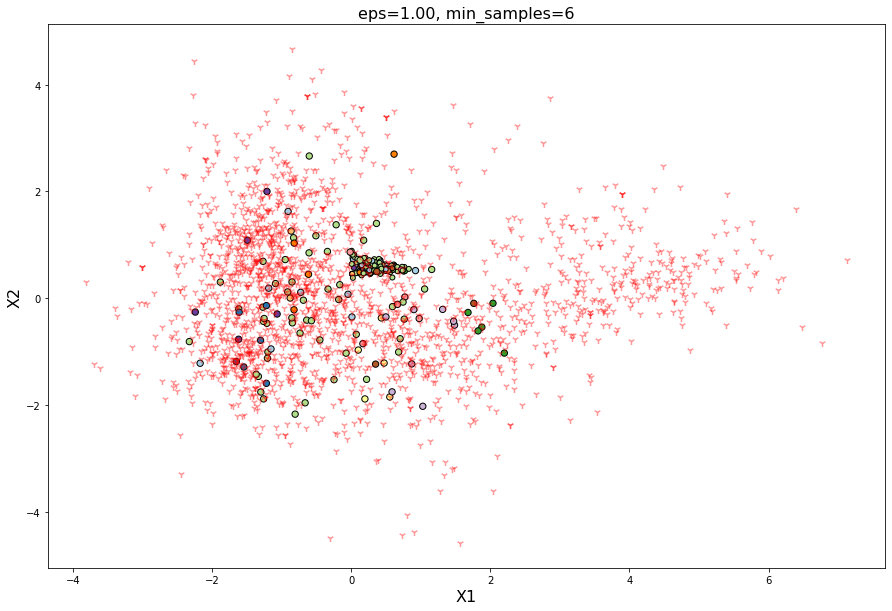

In [ ]:
plot_dbscan(dbscan, X_train_2d)

Despite the above dbscan being run several times varying the hyperparameters, there are still a nightmarish amount of "anomalies" (red points). We likely need something a bit different to get well defined clusters. 

----

### TSNE for dimensionality reduction and clustering 
T-SNE has had some popularity recently as a dimensionality reduction technique and if usually paired with a more 'typical' clustering system. Before we tie it to a clustering algorithm we need to dial in the hyperparameters.

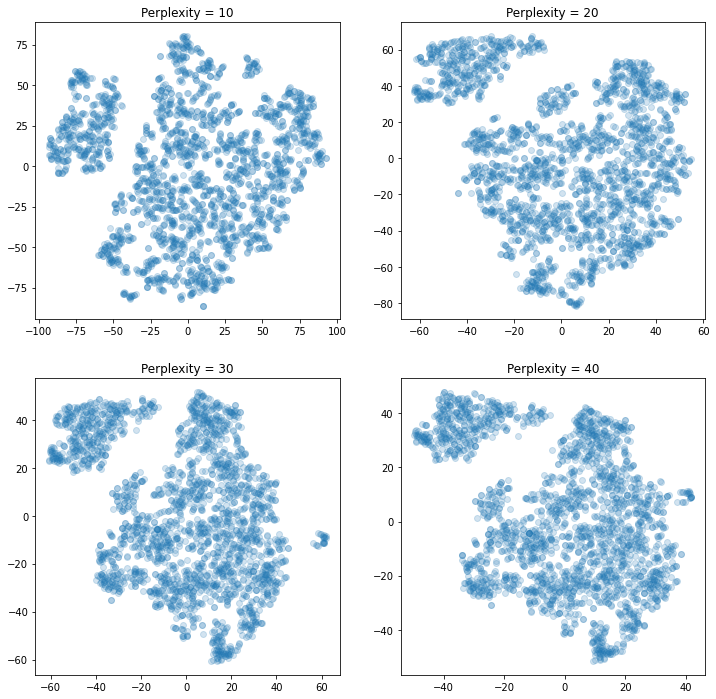

In [ ]:
# iterating through perplexity values
fig, axes = plt.subplots(2, 2, figsize=(12,12))
for i, perplexity in enumerate([10, 20, 30, 40]):
    plt.sca(axes[i // 2, i % 2])
    tsne_scaled = make_pipeline(StandardScaler(), TSNE(n_components=2,init='pca',perplexity=perplexity, random_state=111))
    data_tsned = tsne_scaled.fit_transform(X_train)
    plt.scatter(data_tsned[:, 0], data_tsned[:, 1], alpha=0.2)
    plt.title("Perplexity = {}".format(perplexity))

Perpelexity between around 30 seems to be providing distinct clusters, though I think 20 would also be an accepatble choice. Now that we have a starting point for T-SNE to operate as our dimensionality reducer we can now feed that back into the DBSCAN algorithm to get some distinct clusters.

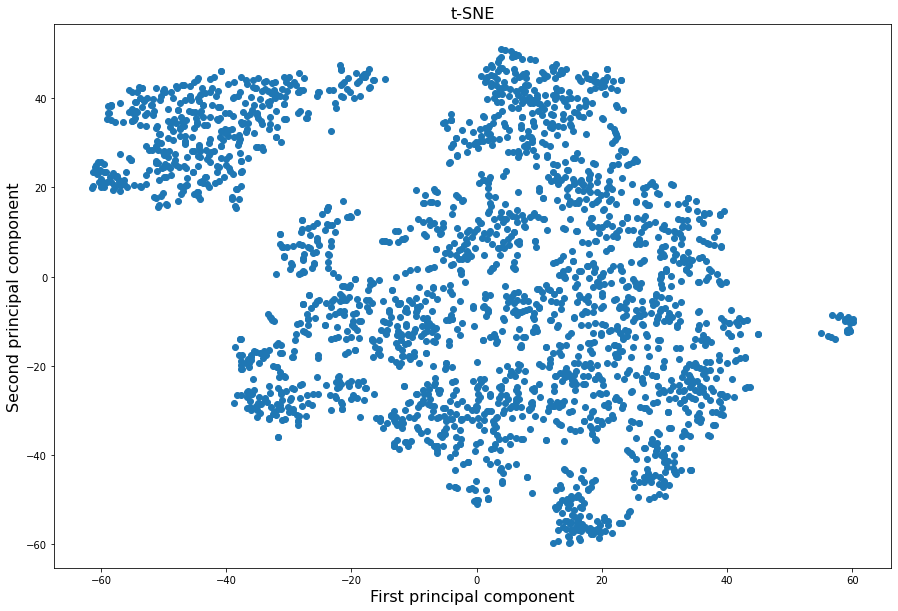

In [ ]:
# Plotting the perplexity = 30 section a bit larger 
tsne_pipeline = make_pipeline(StandardScaler(), TSNE(init='pca',n_components=2,learning_rate=170,perplexity=30, random_state=42))
data_tsne = tsne_pipeline.fit_transform(X_train)
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(data_tsne[:,0], data_tsne[:,1])
plt.title("t-SNE", fontsize = 16)
plt.xlabel("First principal component", fontsize = 16)
plt.ylabel("Second principal component", fontsize = 16)
plt.show()

Now that we have our dimensionality reduction system, we need to tune the hyperparameters of the clustering algorithm. Below is  a grid displaying the groupings across the useful ranges of the parameters. The range of parameters here has been limited to remove the iterations that failed/errored or we unhelpful.

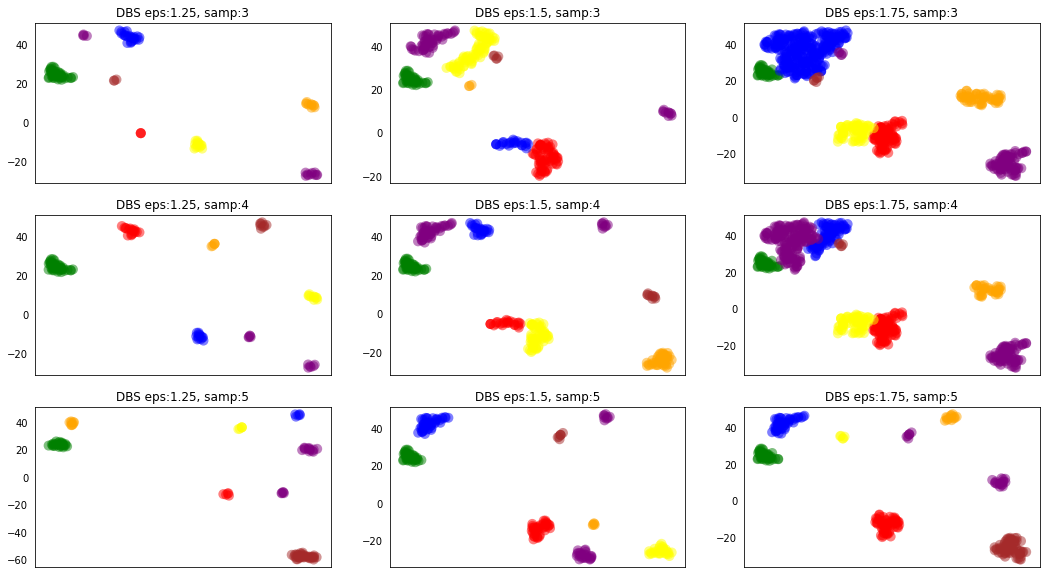

In [ ]:

from itertools import product
tsne_scaled = make_pipeline(StandardScaler(), TSNE(n_components=2,init='pca',perplexity=30, random_state=111))
data_tsned = tsne_scaled.fit_transform(X_train)
tsne_comp_df = pd.DataFrame(data_tsned, index=X_train.index)

# plotting loop for dbscan tuning modified from https://towardsdatascience.com/high-dimension-clustering-w-t-sne-dbscan-dcec77e6a39b
samples = [3,4,5]
eps_list = [1.25, 1.5, 1.75]
rows = len(samples)
fig, ax = plt.subplots(len(samples), len(eps_list), figsize=(18,10))
for k,(eps, samp) in enumerate(product(eps_list, samples)):
    ax[k%rows][k//rows].tick_params(axis='both', which='both',bottom=False, top=False, left=False, labelbottom=False)
    
    T_df = tsne_comp_df.copy()
    clustering = DBSCAN(eps=eps, min_samples=samp).fit(T_df)
    T_df.insert(0, 'cluster', clustering.labels_)
    datas = [[T_df[T_df['cluster'] ==i][j]for j in range(2)]for i in range(len(set(clustering.labels_)))]
    colors = ('green','red','blue','yellow','purple','brown','orange','purple')
    groups = [str(i) for i in range(len(set(clustering.labels_)))]
    for data, color, group in zip(datas, colors, groups):
        ax[k%rows][k//rows].scatter(data[0], data[1], alpha=0.5, c=color, edgecolors='none',s=100, label=group)
        ax[k%rows][k//rows].set_title(f"DBS eps:{eps}, samp:{samp}")

In [ ]:
# Another plotting utility from the same article. This will plot the clusters and annotate with labels.
def plot_big(clustering_name, reducer_name, model, df_comp, dims=2, countries=30, truth_df=None):
    df_comp2 = df_comp.copy()
    fig,ax = plt.subplots(figsize=(20,12))

    m = model.fit(df_comp2)  # first 3 cols, or dims
    df_comp2.insert(0, 'cluster', m.labels_)
    
    datas = []
    for i in range(len(set(m.labels_))):
        tup = []
        for j in range(dims):
            tup.append(df_comp2[df_comp2['cluster']==i][j])
        datas.append(tup)

    groups = [clustering_name+str(i) for i in range(len(set(m.labels_)))]
    colors = ('green','red','yellow','cyan','purple','brown')

    for data,color,group in zip(datas,colors,groups):
        x,y = data[0],data[1]
        ax.scatter(x, y, alpha=0.5, c=color, edgecolors='none', s=500, label=group)
        ax.set_title(f'{reducer_name} {clustering_name} {len(set(m.labels_))} clusters')
        ax.set(xlabel=f'{reducer_name}1')
        ax.set(ylabel=f'{reducer_name}2')

#     for index,row in df_comp2[df_comp2.index.isin(['rock','pop','funk', 'hip hop', 'country', 'latin', 'reggae', 'electronic','punk'])].iterrows():
#         ax.annotate(index, (row[0],row[1]))
#     txt_list = {}
    for index,row in df_comp2.sample(countries, random_state=111).iterrows():
        annot_text = truth_df.loc[index, 'genres']
#         txt_list[index] = annot_text
        ax.annotate(annot_text, (row[0],row[1]))

    plt.legend(loc=1)
    plt.show()
    return df_comp2

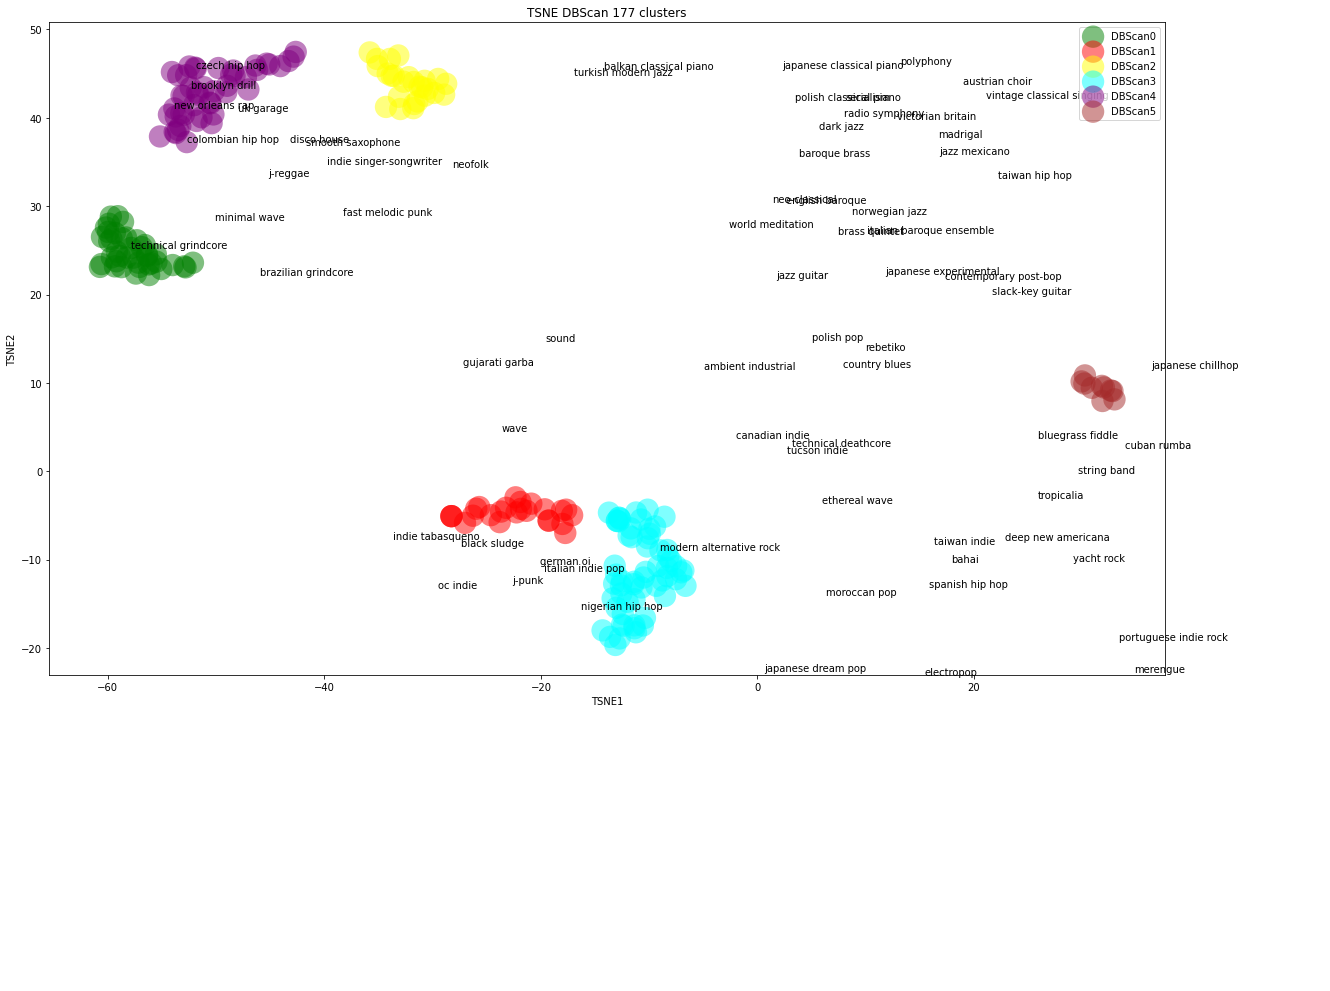

In [ ]:
plotting_df=tsne_comp_df.copy()


clustering = DBSCAN(eps=1.5, min_samples=4).fit(plotting_df)
# y_train.loc[y_train['genres'] == 'funk']
txt_list = plot_big('DBScan','TSNE',clustering, plotting_df, countries=100, truth_df=y_train)

We can see that there are indeed similar groups in each cluster, I struggled to get the labeled points to show only for the colored sections. Even still, I think the fact that we can see a group in the top center that are jazz or could be loosely called 'jazz-like' shows that the DBSCAN is finding some underlying structure

In [ ]:
def plot_dbscan(dbscan, X, size = [100, 40]):
    cores = dbscan.components_
    anomalies = X[dbscan.labels_ == -1]
    bound_index = list(set(np.where(dbscan.labels_ != -1)[0]).symmetric_difference(dbscan.core_sample_indices_))
    boundaries = X[bound_index]
    
    plt.scatter(cores[:, 0], cores[:, 1], marker='^', s=size[0],# edgecolors='k',
                c=dbscan.labels_[dbscan.core_sample_indices_], cmap=plt.cm.Paired)
    
    plt.scatter(boundaries[:, 0], boundaries[:, 1], marker='o', s=size[1], edgecolors='k',
                c=dbscan.labels_[bound_index], cmap=plt.cm.Paired)
    
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", alpha=0.4, s=size[0])
    plt.xlabel("X1", fontsize=16)
    plt.ylabel("X2", fontsize=16)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=16)

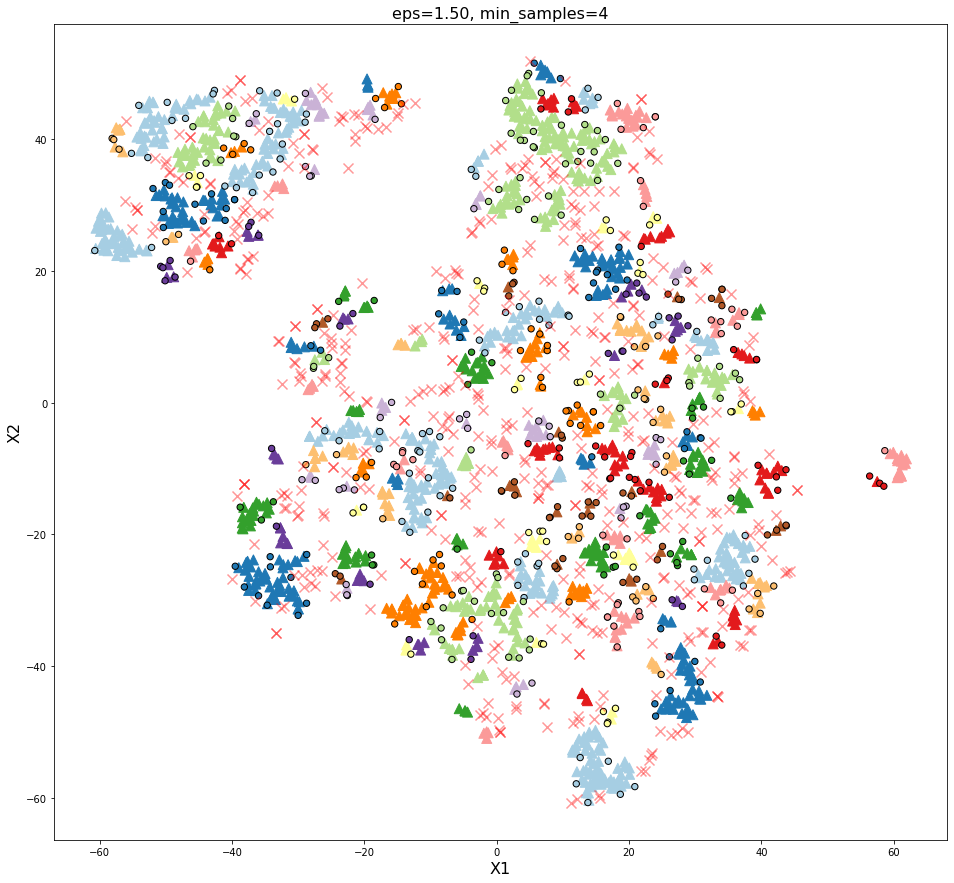

In [ ]:
plt.figure(figsize=(16,15))
plot_dbscan(clustering, plotting_df.to_numpy())

Finally we plotted the core samples, boundry points and the anomalies on one graph. Ideally we would like to see all the genres belonging to some group but that might be too ambitious. There are going to be genres that could fit in multiple groups or ones that are so different they are off on there own. 

I would hesitate to say this combination of dbscan and tsne displays anything concrete yet. I would say that it has certainly identified some structure but since the data was reduced to 2 dimensions we might not be seeing some other way the groups are connected. 

---


### Moving forward

I do think this dataset could be used to influence a reccomendation engine, but there is still work to do before we can apply these groupings with confidence. 

Steps to take in the future:


1.   Eliminate some of the less important features from the initial dataset based on the explained variance. Then repeat clustering attempts
2.   Use T-SNE to reduce dimensionality to 3D to see if the boundries make any more sense there.
3.  Implement the new versions of manifold learning such as UMAP
4.  Implement HDBSCAN
5.  Develop a method to apply the groupings to individual songs or set of songs for the recommendation system




## Billboards Dataset Exploration and Analysis ##

In Phase-1 we mentioned that we wanted to see if the features of a song could indicate whether a song will be a hit or not. So our first instinct was to look at the popularity column. But according to Spotify, popularity is a time-based measure. If a song was popular in the past but is not being played recently, its popularity score will eventually go down.
Hence popularity is not the same as Hit.
We will assume that if a song appeared on the Billboard 100 at least once, it is considered a Hit song.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
from datetime import datetime

The hits.csv file mentioned below was pre-processed in the notebook billboard100.ipynb. The file was created by collecting a dataset of all billboard 100 hits between 1999-2019 and flaging any song in our data.csv file as a 1 if the song appeared in the billboard dataset. The code was not included in this notebook due to a lengthy runtime.

In [ ]:
#Read the Hits dataset that we pre-processed
data = pd.read_csv("./billboard100_dataset/hits.csv")
data["release_date"] = pd.to_datetime(data["release_date"], format = '%Y-%m-%d')
data = data[data["release_date"] < datetime(2019, 7, 7)]

In [ ]:
#Drop non-feature data
data.drop(["Unnamed: 0", "artist", "year", "id", "release_date", "name"], axis=1, inplace=True)

In [ ]:
data.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence', 'Hit'],
      dtype='object')

In [ ]:
len(data)

36917

In [ ]:
data.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
popularity          0
speechiness         0
tempo               0
valence             0
Hit                 0
dtype: int64

In [ ]:
data.head()

acousticness  danceability  duration_ms  ...    tempo  valence  Hit
0         0.394         0.484       160187  ...  113.564    0.285  0.0
1         0.255         0.405       141987  ...  104.536    0.588  0.0
2         0.406         0.477       157093  ...  106.773    0.478  0.0
3         0.887         0.319       187333  ...  117.153    0.239  0.0
4         0.938         0.269       236800  ...   82.332    0.160  0.0

[5 rows x 15 columns]

### Analyzing the hits dataset

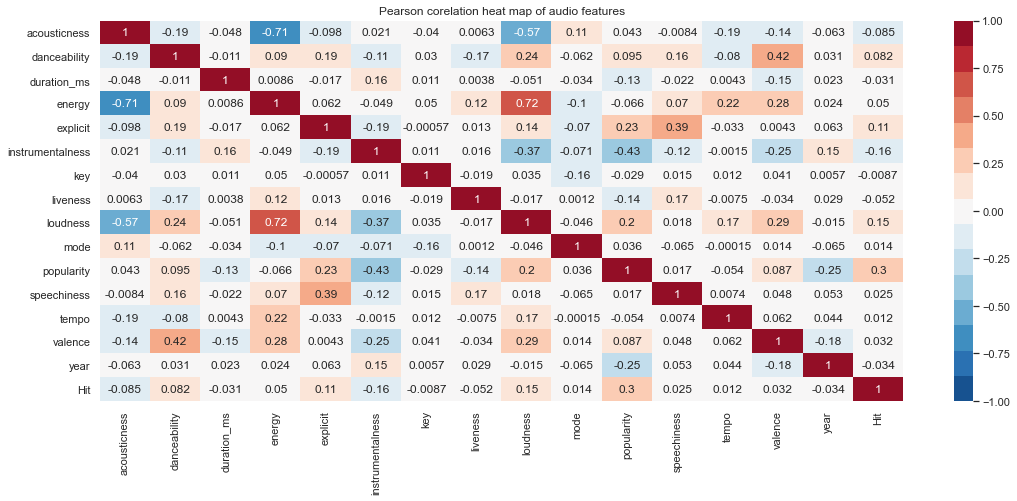

In [ ]:
#Looking at pearson corelation
plt.figure(figsize=(18,7))
sns.heatmap(data.corr(method='pearson'), 
            annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.title("Pearson corelation heat map of audio features")
plt.show()

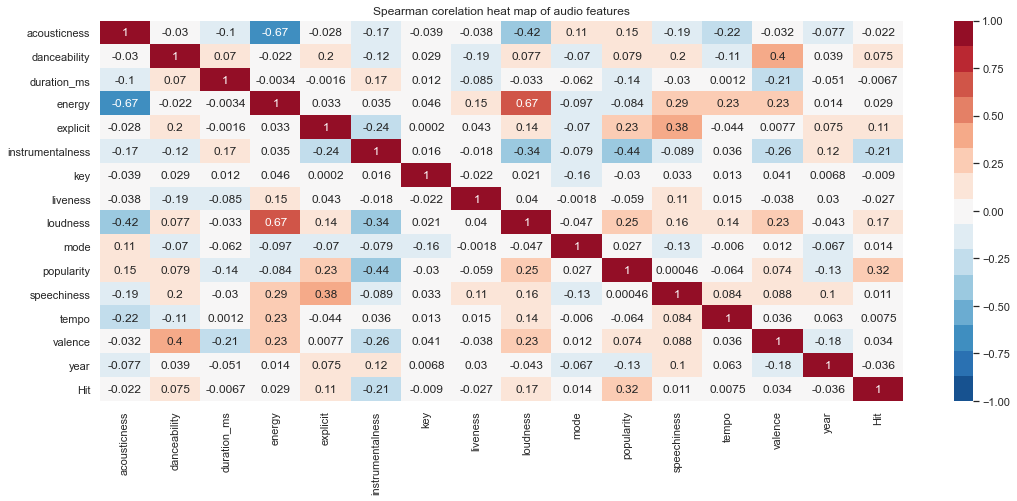

In [ ]:
#Looking at Spearman corelation
plt.figure(figsize=(18,7))
sns.heatmap(data.corr(method='spearman'), 
            annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.title("Spearman corelation heat map of audio features")
plt.show()

Looking at the corelation of the audio features with the Hits column, it seems dancibility, explicitness, instrumentalness, loudness and as expected - popularity has the most linear relationship.

### Spotify popularity vs. Billboard Hits

We will try to see if Spotify's popularity data says anything about the Billboard hits

In [ ]:
popdf = data[['popularity', 'Hit']]
popdf

popularity  Hit
0              55  0.0
1              39  0.0
2              34  0.0
3              27  0.0
4              26  0.0
...           ...  ...
44038          63  0.0
44039           1  0.0
44041           1  0.0
44044          68  0.0
44181           5  0.0

[36917 rows x 2 columns]

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'Hit'}>]], dtype=object)

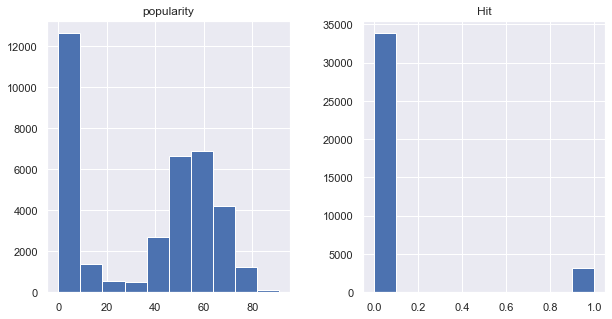

In [ ]:
popdf.hist(figsize = (10,5))

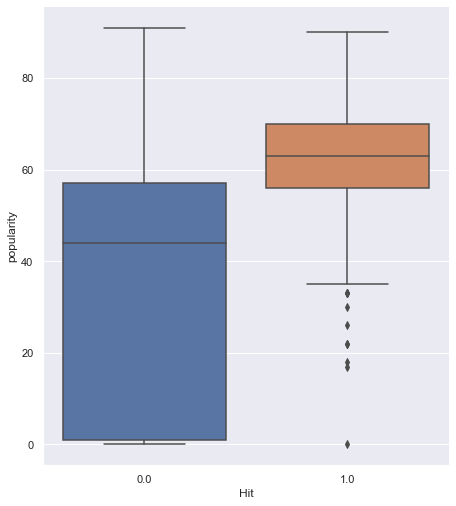

In [ ]:
 g = sns.catplot(x="Hit", y="popularity",data=popdf, kind="box",height=7, aspect=.9)

From the boxplot above, it seems that most of our billboard hits have a Spotify popularity score above 60. Although the data contains some outliers. Some of the hits are have a popularity score of 0. Lets see how many hit songs have a popularity score of 0 

In [ ]:
data.query('Hit == 1 & popularity <30')

acousticness  danceability  duration_ms  energy  explicit  \
3624         0.4980         0.736       230813   0.795         1   
8053         0.1990         0.630       222160   0.928         0   
8128         0.0389         0.738       212640   0.868         0   
8288         0.5080         0.665       189853   0.637         1   
12570        0.2710         0.689       204107   0.731         0   
35286        0.9080         0.404       328795   0.143         0   

       instrumentalness  key  liveness  loudness  mode  popularity  \
3624           0.000001    1    0.2540    -3.299     0          22   
8053           0.124000    9    0.1480    -2.787     0          22   
8128           0.001710   11    0.3880    -4.373     0          18   
8288           0.000000   11    0.1480    -7.034     1          26   
12570          0.000000    0    0.4160    -3.469     1          17   
35286          0.000005    4    0.0943   -17.719     0           0   

       speechiness    tempo  valence  year  Hit  
3624        0.0545  104.066    0.511  2017  1.0  
8053        0.0331  123.963    0.465  2017  1.0  
8128        0.0731  122.003    0.336  2017  1.0  
8288        0.0568  124.997    0.587  2018  1.0  
12570       0.1100  125.997    0.673  2017  1.0  
35286       0.0354  118.809    0.117  2019  1.0

Looks like the record with the 0 score also has very low values for the other features as well. It might be that spotify wasnt able to collect data well on this record.

### Danceability, explicit, instrumentalness, loudness, popularity vs Billboard Hits

We will now try to discover any patterns we see that can explain the relationship between Hits and all the fields that showed the highest corelations

In [ ]:
relcols =['danceability', 'explicit', 'instrumentalness', 'loudness', 'popularity', 'Hit']
cordf = data[relcols]
cordf

danceability  explicit  instrumentalness  loudness  popularity  Hit
0             0.484         0          0.000000   -11.101          55  0.0
1             0.405         0          0.000005   -10.226          39  0.0
2             0.477         0          0.000000   -14.165          34  0.0
3             0.319         0          0.000000   -17.796          27  0.0
4             0.269         0          0.000005   -18.168          26  0.0
...             ...       ...               ...       ...         ...  ...
44038         0.505         1          0.000000    -4.966          63  0.0
44039         0.208         0          0.592000   -23.258           1  0.0
44041         0.327         0          0.980000   -21.423           1  0.0
44044         0.774         0          0.000000    -6.869          68  0.0
44181         0.520         0          0.909000   -23.823           5  0.0

[36917 rows x 6 columns]

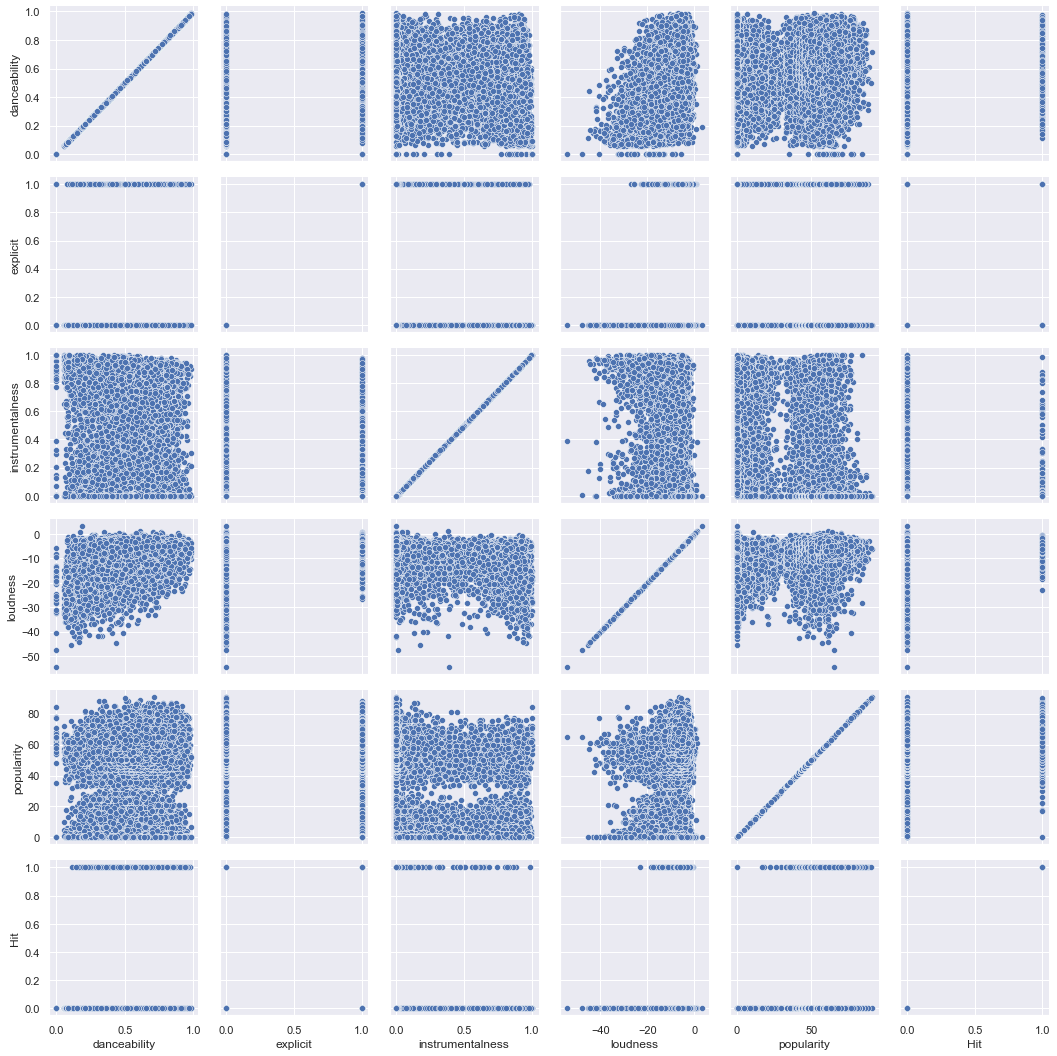

In [ ]:
g = sns.PairGrid(cordf)
g.map(sns.scatterplot)

From the plots above it looks like loudness has an interesting pattern. Most of the hits are on the loder side. Lets look at this more closely

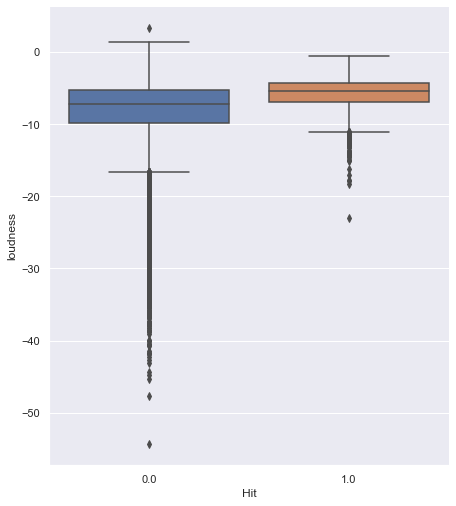

In [ ]:
 g = sns.catplot(x="Hit", y="loudness",data=cordf, kind="box",height=7, aspect=.9)

#### Categorical Variables
1. explicit
2. key
3. mode

#### Continuous Variables
1. acousticness
2. danceability
3. duration_ms
4. energy
5. instrumentalness
6. liveness
7. loudness
8. popularity
9. speechiness
10. tempo
11. valence

#### Target
Hit (0 or 1)

In [ ]:
continuous = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', 'valence']
categorical = ['explicit', 'key', 'mode']

In [ ]:
df_conti = data[continuous]
df_cat = data[categorical]

Scaling the continuous attributes using scikit-learn's StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_conti = scaler.fit_transform(df_conti)
X = np.hstack((df_conti, df_cat.to_numpy()))

In [ ]:
X

array([[ 0.47840359, -0.53396025, -0.47456318, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.02482693, -0.98361078, -0.57066895, ...,  0.        ,
         6.        ,  0.        ],
       [ 0.51756129, -0.5738027 , -0.49090116, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 2.40692019, -1.42756954, -0.08816515, ...,  0.        ,
         9.        ,  0.        ],
       [ 0.68724464,  1.11665564, -0.35515439, ...,  0.        ,
         4.        ,  1.        ],
       [ 2.39386762, -0.32905621, -0.12385102, ...,  0.        ,
         1.        ,  1.        ]])

In [ ]:
X.shape

(36917, 14)

In [ ]:
Y = np.asarray(data['Hit'])

In [ ]:
from collections import Counter
counter = Counter(Y)
counter

Counter({0.0: 33806, 1.0: 3111})

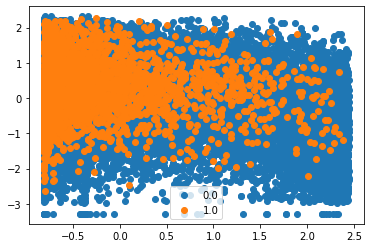

In [ ]:
from matplotlib import pyplot
from numpy import where
for label, _ in counter.items():
	row_ix = where(Y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

##### We have very less number of records which are hits (target 1) which will tend to skew the ML models we are going to try. Balancing the dataset using SMOTE - Minority Oversampling.

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)
counter = Counter(Y)
counter

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0.0: 33806, 1.0: 33806})

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((45300, 14), (22312, 14), (45300,), (22312,))

## Predict Hits using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": np.logspace(-3, 3, 7),
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"]
}

lr = LogisticRegression()
lr_gscv = GridSearchCV(
    lr,
    param_grid,
    cv=5
)

lr_gscv.fit(x_train, y_train)

print(f"Tuned Hyperparameters : {lr_gscv.best_params_}")
print(f"Accuracy : {lr_gscv.best_score_}")

Tuned Hyperparameters : {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.8014569536423842


In [ ]:
y_pred = lr_gscv.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.71      0.78     11227
         1.0       0.75      0.89      0.82     11085

    accuracy                           0.80     22312
   macro avg       0.81      0.80      0.80     22312
weighted avg       0.81      0.80      0.80     22312



##Predict Hits using Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    "kernel": ["linear", "rbf"],
    "C": [1, 10]
}

svc = SVC()
svc_gscv = GridSearchCV(
    svc,
    param_grid,
    cv=5
)

svc_gscv.fit(x_train, y_train)

print(f"Tuned Hyperparameters : {svc_gscv.best_params_}")
print(f"Accuracy : {svc_gscv.best_score_}")

Tuned Hyperparameters : {'C': 10, 'kernel': 'rbf'}
Accuracy : 0.8360485651214127


In [ ]:
y_pred = svc_gscv.predict(x_test)

In [ ]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.72      0.82     11227
         1.0       0.77      0.96      0.85     11085

    accuracy                           0.84     22312
   macro avg       0.86      0.84      0.84     22312
weighted avg       0.86      0.84      0.84     22312



##Predict Hits using Multilayer Perceptron Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(random_state=1, max_iter=1000)
mlp.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = mlp.predict(x_test)

In [ ]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86     11227
         1.0       0.85      0.88      0.87     11085

    accuracy                           0.87     22312
   macro avg       0.87      0.87      0.87     22312
weighted avg       0.87      0.87      0.87     22312



The above analysis indicates a good F1 Score Metric of 0.87 for predicting whether or not a song would be a hit based on the song attributes using a multi-layer perceptron. Logistic Regression and Support Vector Classifiers are not too far behind for this classification task with modest F1 Scores of 0.8 and 0.84 respectively.

This gives us a solid reason to believe that song attributes can go a long way in predicting whether a song will be on the top of the charts. Further exploration needs to be done by reducing dimensionality and cross-correlation among attributes. Principle Component Analysis (PCA) can also be performed paired with stronger ensemble learning models to produce a concrete and justified result.

## Conclusion

Beyond the documentation provided by Spotify, the team wasn’t  able to determine how Spotify generated the data points and whether there is any interdependencies within the features.

Based on the experiments our team performed, we believe that the Spotify data-set can be used to predict popularity.


We also believe that there more analysis should be done to tune the models to better predict popularity.


Certain features of the data set don’t seem to have entirely accurate data points.
